## Importing The Dependencies


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import PIL 
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix


Loading MINST Data from Keras.datasets

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
# Shape of Numpy Arrays

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60000
Testing Data = 10000
Image Diemention = 28x28
Grayscale Image = 1 Channel

In [5]:
#Printing 10th images

print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


2


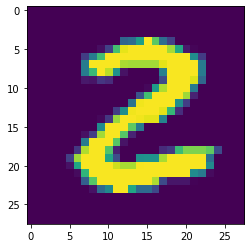

In [7]:
#Displaying The Imgae
plt.imshow(x_train[25])

#Displaying Labels
print(y_train[25])


## Image Labels

In [8]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [9]:
#uinque Values in Y_train
print(np.unique(y_train))

#uinque Values in Y_test
print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply OneHOtencoding

All the images have same diemention in this data set ,if not ,we have to resize all the images to a common dimention

In [10]:
#Scalling the values

x_train = x_train/255
x_test = x_test/255

In [11]:
#Printing 10th images

print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building The Neural Network 

In [12]:
# Setting up the layers of Neural Network

model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(50,activation='relu'),
      keras.layers.Dense(50,activation='relu'),
      keras.layers.Dense(10,activation='sigmoid')



])

In [13]:
#Compiling the neural network

model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
# Training the Neural Network

model.fit(x_train,y_train,epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0683 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0403 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.034

Training Data Acurracy is : 98.83%





***Accuracy on Test Data***

In [15]:
loss,accuracy = model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1051 - accuracy: 0.9699
0.9699000120162964


## **Test Data Acurracy is : 96.99%**


In [16]:
print(x_test.shape)

(10000, 28, 28)


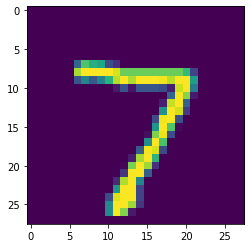

In [17]:
#First test point in x_test

plt.imshow(x_test[0])
plt.show()

In [18]:
print(y_test[0])

7


In [19]:
Y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[1.4374391e-03 7.1467441e-01 6.1776555e-01 6.3362604e-01 1.2592117e-04
 8.9226983e-04 1.1089677e-08 9.9999857e-01 9.5946109e-03 6.5481454e-02]


model.predict gives prediction of probability of each class for that data point


In [22]:
# Converting the prediction probability to class label

Label_for_first_image = np.argmax(Y_pred[0])
print(Label_for_first_image)

7


In [23]:
# Converting the prediction probability to class label for all test data

Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)



[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test  - is my true Labels 
Y_pred labels -  my prdicted labels

## confusion Matrix

In [24]:
conf_max = confusion_matrix(y_test,Y_pred_label)

In [25]:
print(conf_max)

tf.Tensor(
[[ 969    1    0    1    1    1    2    2    3    0]
 [   0 1122    0    3    0    3    2    1    4    0]
 [   5    1  983    7    8    2    5    8   13    0]
 [   0    0    2  972    0   25    0    3    4    4]
 [   1    0    2    0  965    3    5    1    1    4]
 [   2    0    0    4    1  879    3    1    2    0]
 [   5    3    0    1    4   10  932    0    3    0]
 [   1    7    6    1    5    0    0  995    7    6]
 [   2    0    1    6    4   14    2    3  939    3]
 [   2    4    0    6   26   11    2    6    9  943]], shape=(10, 10), dtype=int32)


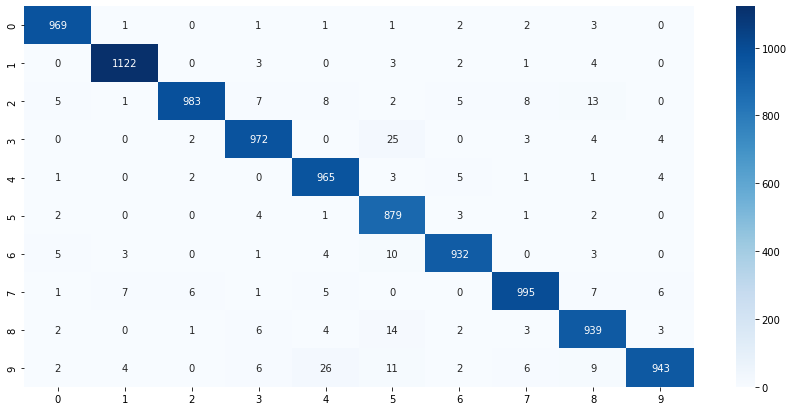

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_max,annot=True,fmt='d',cmap='Blues')



## Building a Predictive System

In [32]:
input_image_path = '/content/download.png'

input_image = cv2.imread(input_image_path)


In [33]:
type(input_image)

numpy.ndarray

In [34]:
print(input_image)

[[[143 143 143]
  [110 110 110]
  [113 113 113]
  ...
  [113 113 113]
  [ 95  95  95]
  [195 195 195]]

 [[110 110 110]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [182 182 182]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 ...

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]]


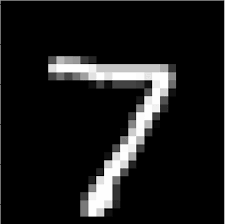

In [35]:
cv2_imshow(input_image)

In [36]:
input_image.shape

(224, 225, 3)

In [37]:
Grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [38]:
Grayscale.shape

(224, 225)

In [39]:
input_image_resize = cv2.resize(Grayscale,(28,28))

In [40]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [42]:
input_image_resize  = input_image_resize/255

In [43]:
input_reshaped = np.reshape(input_image_resize,[1,28,28])

In [44]:
input_prediction = model.predict(input_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 21ms/step
[[1.4128453e-03 7.1233672e-01 6.1276609e-01 6.3431597e-01 1.2935585e-04
  8.5232581e-04 1.0605039e-08 9.9999857e-01 9.3831755e-03 6.8504862e-02]]


In [45]:
input_pred_label = np.argmax(input_prediction)

In [46]:
print(input_pred_label)

7


Predictive System

Path of the image to be predicted :/content/download.jpg


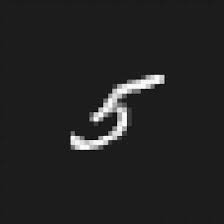

1/1 [==============================] - 0s 18ms/step
the Handwritten digit recognized as :  3


In [49]:
input_image_path = input("Path of the image to be predicted :")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

Grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(Grayscale,(28,28))

input_image_resize  = input_image_resize/255

input_reshaped = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(input_reshaped)

input_pred_label = np.argmax(input_prediction)

print("the Handwritten digit recognized as : ",input_pred_label)


In [53]:
!pip install gradio
import gradio as gr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.8 MB 33.0 MB/s 
     |████████████████████████████████| 278 kB 61.5 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 2.3 MB 75.2 MB/s 
     |████████████████████████████████| 84 kB 2.2 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 106 kB 35.1 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 
     |████████████████████████████████| 68 kB 6.7 MB/s 
     |████████████████████████████████| 58 kB 5.3 MB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4711 sha256=4c124ceb8d05edc340980fd52abfb70ad8e865962632c3742d43e566991dbb1b
  Stored in direc

In [50]:
import gradio as gr


def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(input_prediction)
  return pred


ModuleNotFoundError: ignored

In [ ]:
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")


In [ ]:
iface.launch(debug='True')
